In [1]:
%matplotlib widget
import zarr_fuse as zf
import ipympl

# Import necessary libraries
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import contextily as ctx
import pyproj
import numpy as np

import json

Removing inconsistent TZ codes: {'-02', 'CST', '+07', '+00', '+09', '+12', '+04', '-04', '-03', 'IST', 'WAT', '+0430', '+11', 'EAT', 'CDT', '+08', '+13', 'ACST', 'AEST', '-06', 'PST', '+05', '+06', '+10'}


In [2]:
from hlavo_surface import inputs
work_dir = inputs.work_dir

root_node = zf.Node.read_store(work_dir / "surface.zarr")
fields = {
    'bukov': ['0_05m', '0_5m', '1_0m', '6_0m'] #['air_temperature', 'precipitation_amount', 'relative_humidity']
}


#print(root_node['bukov'].dataset.coords['date_time'])

C:\Users\peta\PycharmProjects\zarr_fuse\zarr_fuse\zarr_storage.py:444: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr(self.store, group=rel_path)
C:\Users\peta\PycharmProjects\zarr_fuse\app\hlavo_surface\venv\Lib\site-packages\zarr\core\group.py:3313: UserWarning: Object at logs is not recognized as a component of a Zarr hierarchy.
  warnings.warn(
C:\Users\peta\PycharmProjects\zarr_fuse\zarr_fuse\zarr_storage.py:444: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but success

C:\Users\peta\PycharmProjects\zarr_fuse\zarr_fuse\zarr_storage.py:444: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_metadata().
2. Explicitly setting consolidated=False, to avoid trying to read consolidate metadata, or
3. Explicitly setting consolidated=True, to raise an error in this case instead of falling back to try reading non-consolidated metadata.
  ds = xr.open_zarr(self.store, group=rel_path)
C:\Users\peta\PycharmProjects\zarr_fuse\zarr_fuse\zarr_storage.py:444: RuntimeWarning: Failed to open Zarr store with consolidated metadata, but successfully read with non-consolidated metadata. This is typically much slower for opening a dataset. To silence this warning, consider:
1. Consolidating metadata in this existing store with zarr.consolidate_met

<xarray.DataArray 'lat_lon' (lat_lon: 7)> Size: 56B
array([ 738126806688126457, 1830614144478852723, 5321743495757184969,
       5557168794882853294, 6865921374334339544, 7746448648371365809,
       7931707954456056193])
Coordinates:
  * lat_lon  (lat_lon) int64 56B 738126806688126457 ... 7931707954456056193
Attributes:
    composed:     ['latitude', 'longitude']
    description:  \n\nExample of coordinate indexed uniquely by a tuple of va...
    chunk_size:   64
Coord: lat_lon, ('lat_lon',)
Coord: date_time, ('date_time',)
Read DF: ['0_05m', '0_5m', '1_0m', '6_0m'], dimss: {'latitude', 'longitude', 'date_time'}
142100


C:\Users\peta\PycharmProjects\zarr_fuse\zarr_fuse\plot\plot_map_view.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_selected['x'], self.df_selected['y'] = zip(
C:\Users\peta\PycharmProjects\zarr_fuse\zarr_fuse\plot\plot_map_view.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_selected['x'], self.df_selected['y'] = zip(


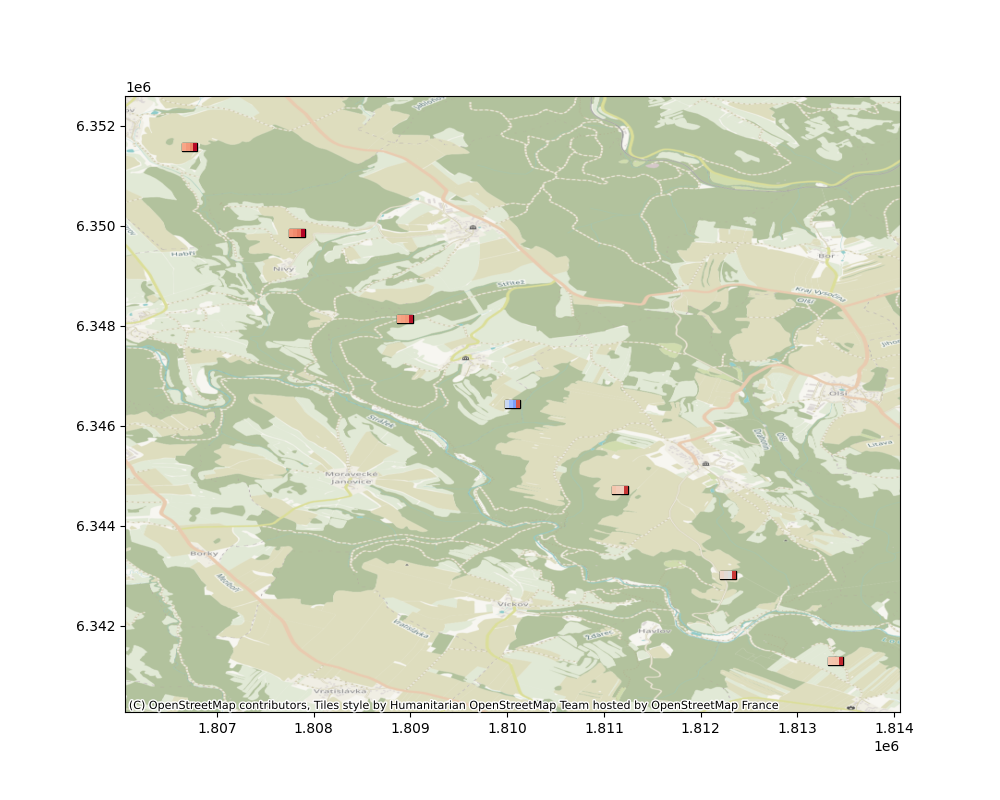

In [3]:
import matplotlib.pyplot as plt
# Create an instance of the InteractiveMapPlotter
node_path = 'bukov'
node = root_node[node_path]
ds = node.dataset
overview = zf.plot.build_overview(root_node)
full_coords = overview[node_path].cumul_coordinates
mid_date_time = full_coords['date_time'].quantile(
            0.5,                     # 50 % quantile = median
            method="nearest"         # or "linear", "midpoint", …
).item() 
#print(mid_date_time)

mid_lat_lon = full_coords['lat_lon'][0]
point_ds = ds.sel(lat_lon=mid_lat_lon)

print(full_coords['lat_lon'])

handlers = []
data_selector = {
    'date_time': 'time_axis',
    'longitude': 'lon_axis',
    'latitude': 'lat_axis',
    '0_05m': plt.cm.coolwarm,
    '0_5m': plt.cm.coolwarm,
    '1_0m': plt.cm.coolwarm,
    '6_0m': plt.cm.coolwarm,
    
    'time_point': None,
    'lon_point': None,
    'lat_point': None
}

df = node.read_df(fields[node_path], date_time=slice(None))
print(len(df))
plotter = zf.plot.InteractiveMapPlotter(df, data_selector, handlers)

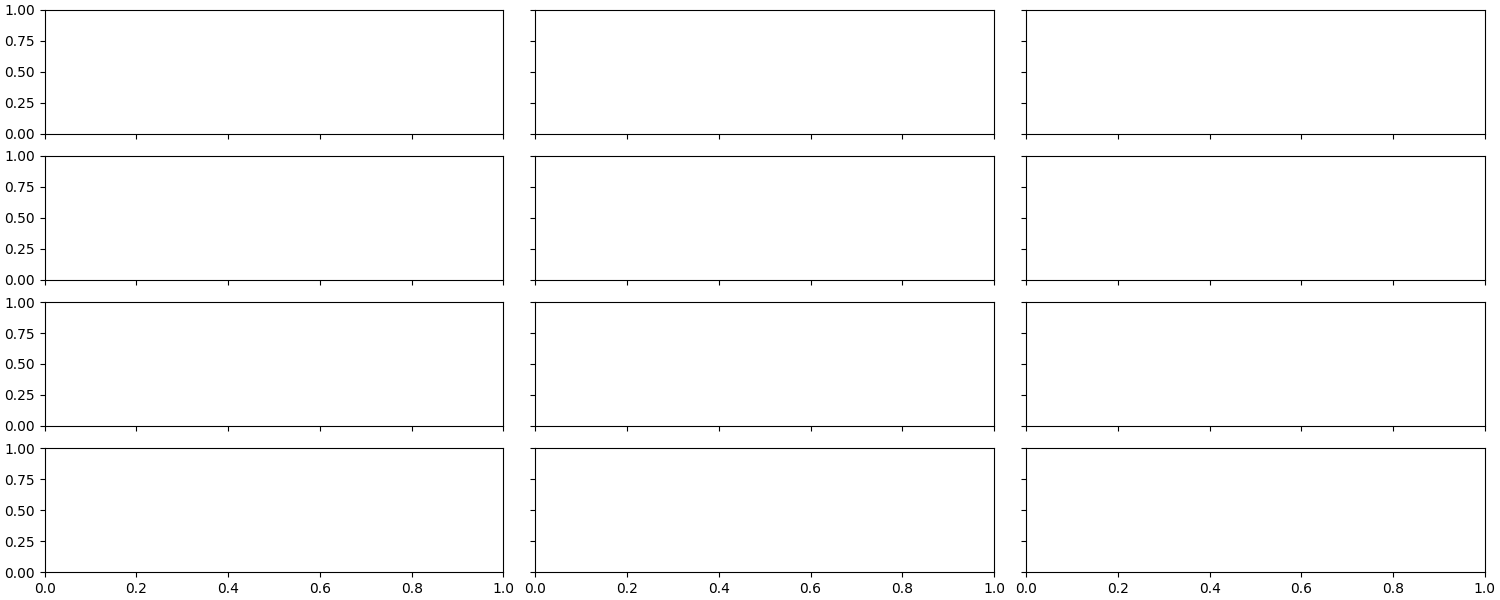

In [4]:

zf.plot.MultiZoomer(df, data_selector, handlers)
